In [6]:
###
# Generating the displacement to calculate the Raman susceptibility. Has to be combined with the phonon eigenvector.
###
from fileinput import filename
from pymatgen.io.vasp import Poscar

poscar = Poscar.from_file("POSCAR")
structure = poscar.structure
# primi_structure = structure.get_primitive_structure()
# structure[0] = "Ba", [0.1, 0, 0]

print()
print("The original strucutre before the perturbations to calculate the Raman susceptibility: ")
print()
print(structure)

num_sites = len(structure.sites)
delta = 0.01
j = 1

# Generating the atomic displacements along x-direction for all atoms
for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [delta, 0, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1

for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [-delta, 0, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1
    
# Generating the atomic displacements along y-direction for all atoms

for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, delta, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1


for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, -delta, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1


# Generating the atomic displacements along z-direction for all atoms
for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, 0, delta], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1

for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, 0, -delta], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1


KeyboardInterrupt: 

# Generating the displacements
### Generating the displacements to calculate the Raman susceptibility using finite difference method.

In [ ]:
### 
#The POSCAR file has to exist when you run the code.
###
from fileinput import filename
from pymatgen.io.vasp import Poscar

poscar = Poscar.from_file("POSCAR")
structure = poscar.structure

print()
print("The original strucutre before the perturbations to calculate the Raman susceptibility: ")
print()
print(structure)

num_sites = len(structure.sites)
j = 1
delta = 0.01

# Generating the atomic displacements along x-direction for all atoms
for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [delta, 0, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1

for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [-delta, 0, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1
    
# Generating the atomic displacements along y-direction for all atoms

for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, delta, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1


for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, -delta, 0], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1


# Generating the atomic displacements along z-direction for all atoms
for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, 0, delta], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1

for i in range(0, len(structure.sites)):
    poscar = Poscar.from_file("POSCAR") # Initialize the original structure, otherwise the displacements are gonna accumulate
    structure = poscar.structure
    structure.translate_sites(i, [0, 0, -delta], False, False)
    structure.to(filename=f'POSCAR_{j:03d}')
    j += 1


# Change in dielectric tensor (dchi_dtau)

In [3]:
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd

pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.01 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    return (dielec(f"{i+n_atom+((j-1)*(2*n_atom)):03d}") - dielec(f"{i+((j-1)*(2*n_atom)):03d}")) * (-1)/(2*delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)

change_die.to_csv('dchi_dtau', index=False)
print("The values of dchi_dtau are")

FileNotFoundError: [Errno 2] No such file or directory: 'POSCAR'

# Calculating the ionic Pockels tensor
### Calculating the ionic Pockels tensor and Raman susceptibility tensor using finite difference method

In [8]:
### Latest version of the code ###
## You need band.yaml file from the PHONOPY result that only contains Gamma point phonon frequency ##
## You need vasprun.xml to extract the Born effective charge from the LEPSILON calculation ##

 
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd


pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.01 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    return (dielec(f"{i+n_atom+((j-1)*(2*n_atom)):03d}") - dielec(f"{i+((j-1)*(2*n_atom)):03d}")) * (-1)/(2*delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)

print("The values of dchi_dtau are")
print()



print("Also, the change of the dielectric tensor is")        
arr = change_die.loc[:,'delta_Xi'].values 
arr = arr/(4*np.pi)

for i in range(0, 3*(n_atom)):
    print("")
    print(arr[i])


def get_phonons(qpoint_file='band.yaml', band=4, poscar='POSCAR'):
    with open(qpoint_file, 'r') as file:
        data = yaml.safe_load(file)

    freq = data['phonon'][0]['band'][band-1]['frequency']     # frequency of band
    eig = np.array(data['phonon'][0]['band'][band-1]['eigenvector'])      # eigenvector of band
    eig = eig[:,:,0]

    structure = ase.io.read(poscar)
    mass = structure.get_masses()
    eig = eig / np.sqrt(np.tile(mass, (3,1)).T)     # eigendisplacements = eigenvectors / sqrt(mass).

    return (freq, eig)

def get_Born(vasprun_born='vasprun.xml'):
    tree = ET.parse(vasprun_born)
    root = tree.getroot()
    natom = n_atom
    born = np.zeros((natom,3,3))
    x = root.findall("./calculation/array[@name='born_charges']/set/v")
    for i,j in enumerate(x):
        born[i//3][i%3] = j.text.split()
    return born

born = get_Born()
print("Born effective charge is")
print(born)

def calculate_polarity(born, eig):
    return np.einsum('ijk,ik->j', born, eig)

def ionic_Pockels(dchi_dtau, polarity):
    ionic_Pockels_tensor = np.zeros([6,3])
    for i in range(0, 3):
        for j in range(0,3):
            ionic_Pockels_tensor[i,j] = dchi_dtau[i,i] * polarity[j] * (1/((epsilon_bulk[i,i])**2))
    for j in range(0,3):
        ionic_Pockels_tensor[3,j] = dchi_dtau[1,2] * polarity[j] * (1/((epsilon_bulk[1,1])*(epsilon_bulk[2,2])))
    for j in range(0,3):
        ionic_Pockels_tensor[4,j] = dchi_dtau[0,2] * polarity[j] * (1/((epsilon_bulk[1,1])*(epsilon_bulk[2,2]))) 
    for j in range(0,3):
        ionic_Pockels_tensor[5,j] = dchi_dtau[0,1] * polarity[j] * (1/((epsilon_bulk[1,1])*(epsilon_bulk[0,0])))         
    return ionic_Pockels_tensor * (-1)  * (1/((freq**2))) * (10**(-24)) * (10**(12)) * (1/(1.67377 * (10**(-27)))) * (10**(10)) * (1.6022) *(10**(-19)) * (4*np.pi) * (4*np.pi)


max_raman = []
total_ionic = np.zeros([6,3])
for i in range(4, (3*n_atom+1)):
    freq, eig = get_phonons(band=i)

    # print("The eigenvectors are")
    # print(eig)

    dchi_dtau = np.zeros([3,3]) # Only one matrix for each eigenmode


    # for j in range(0,3):
    #     dchi_dtau += arr[0+j] * eig[0,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[3+j] * eig[1,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[6+j] * eig[2,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[9+j] * eig[3,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[12+j] * eig[4,j]    

    for k in range(0, n_atom):
        for j in range(0,3):
            dchi_dtau += arr[(k*3)+j] * eig[k,j]
    
    ## Raman susceptibility conversion to compare the VASP and ABINIT results
    alpha = dchi_dtau*np.sqrt(volume)*np.sqrt(Bohr)*np.sqrt(1/1822.89)
            
    max_raman.append(np.max(np.max(np.abs(alpha))))
    print(f"The value of dchi_dtau of mode {i} is")        
    print(dchi_dtau)
    print("End of the value of dchi_dtau")        


    polarity = calculate_polarity(born, eig)
    print("The value of polarity is")
    print(polarity)

    vrun_bulk = Vasprun(f'vasprun.xml')
    epsilon_bulk = np.array(vrun_bulk.epsilon_static)

    ionic_Pockels_ten = ionic_Pockels(dchi_dtau, polarity)
    print(f"The value of the ionic Pockels tensor of mode {i} is")
    print(ionic_Pockels_ten)
    total_ionic += ionic_Pockels_ten

print("volume")
print(structure.get_volume())
print("")
print(f"The value of the total ionic Pockels tensor is (pm/V)")
print(total_ionic)
print("")
print("The maximum components of the Raman susceptibility tensors are (for each mode)")
print(max_raman)

TypeError: get_volume() takes 1 positional argument but 2 were given

In [ ]:
### Latest version of the code ###
## You need band.yaml file from the PHONOPY result that only contains Gamma point phonon frequency ##
## You need vasprun.xml to extract the Born effective charge from the LEPSILON calculation ##

 
import ase.io
import yaml
import numpy as np
import pymatgen.io.vasp
import xml.etree.ElementTree as ET
import yaml
import ase.io
from ase.units import Bohr
from pymatgen.io.vasp import Vasprun
import numpy as np
import pandas as pd


pd.set_option("max_colwidth", None)
Thz_to_cm = 33.356
delta = 0.005 # Finite displacement value in angstrom to calculate dchi_dtau
n_atom = 10
structure = ase.io.read("POSCAR")
volume = structure.get_volume()

def dielec(x):
    """
    Extracting the electronic dielectric tensor

    Args:
        x (integer): number of directory

    Returns:
        array: electronic dielectric tensor
    """
    vrun = Vasprun(f'{x}/vasprun.xml')
    die = vrun.epsilon_static
    return np.array(die)

def first_diff_die(i, j):
    """
      First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)

    Args:
        i (integer): number of atom (according to the POSCAR file order, the index starts from 1 ~)
        j (integer): x(1) or y(2) or z(3)

    Returns:
        array : First-order change in the electronic dielectric susceptibility tensor (Angstrom^-1)
    """
    value = (-3*dielec(f"3-5.raman_0.02_Ang/{i+((j-1)*(2*n_atom)):03d}") + 16*dielec(f"3-4.raman_0.015_Ang/{i+((j-1)*(2*n_atom)):03d}") - 36*dielec(f"3.raman_0.01_Ang/{i+((j-1)*(2*n_atom)):03d}") + 48*dielec(f"3-3.raman_0.005_Ang/{i+((j-1)*(2*n_atom)):03d}") - 25*dielec(f"{000:03d}"))
    return value / (12 * delta)

change_die = pd.DataFrame(columns=["atom", "coordinate", "delta_Xi"])

for i in range(1, n_atom+1):
    for j in range(1,4):
        change_die.loc[len(change_die.index)] = [i, j, first_diff_die(i,j)]

print("The change of the dielectric tensor is")        
print(change_die)

print("The values of dchi_dtau are")
print()



print("Also, the change of the dielectric tensor is")        
arr = change_die.loc[:,'delta_Xi'].values 
arr = arr/(4*np.pi)

for i in range(0, 3*(n_atom)):
    print("")
    print(arr[i])


def get_phonons(qpoint_file='band.yaml', band=4, poscar='POSCAR'):
    with open(qpoint_file, 'r') as file:
        data = yaml.safe_load(file)

    freq = data['phonon'][0]['band'][band-1]['frequency']     # frequency of band
    eig = np.array(data['phonon'][0]['band'][band-1]['eigenvector'])      # eigenvector of band
    eig = eig[:,:,0]

    structure = ase.io.read(poscar)
    mass = structure.get_masses()
    eig = eig / np.sqrt(np.tile(mass, (3,1)).T)     # eigendisplacements = eigenvectors / sqrt(mass).

    return (freq, eig)

def get_Born(vasprun_born='vasprun.xml'):
    tree = ET.parse(vasprun_born)
    root = tree.getroot()
    natom = n_atom
    born = np.zeros((natom,3,3))
    x = root.findall("./calculation/array[@name='born_charges']/set/v")
    for i,j in enumerate(x):
        born[i//3][i%3] = j.text.split()
    return born

born = get_Born()
print("Born effective charge is")
print(born)

def calculate_polarity(born, eig):
    return np.einsum('ijk,ik->j', born, eig)

def ionic_Pockels(dchi_dtau, polarity):
    ionic_Pockels_tensor = np.zeros([6,3])
    for i in range(0, 3):
        for j in range(0,3):
            ionic_Pockels_tensor[i,j] = dchi_dtau[i,i] * polarity[j] * (1/((epsilon_bulk[i,i])**2))
    for j in range(0,3):
        ionic_Pockels_tensor[3,j] = dchi_dtau[1,2] * polarity[j] * (1/((epsilon_bulk[1,1])*(epsilon_bulk[2,2])))
    for j in range(0,3):
        ionic_Pockels_tensor[4,j] = dchi_dtau[0,2] * polarity[j] * (1/((epsilon_bulk[1,1])*(epsilon_bulk[2,2]))) 
    for j in range(0,3):
        ionic_Pockels_tensor[5,j] = dchi_dtau[0,1] * polarity[j] * (1/((epsilon_bulk[1,1])*(epsilon_bulk[0,0])))         
    return ionic_Pockels_tensor * (-1)  * (1/((freq**2))) * (10**(-24)) * (10**(12)) * (1/(1.67377 * (10**(-27)))) * (10**(10)) * (1.6022) *(10**(-19)) * (4*np.pi) * (4*np.pi)


max_raman = []
total_ionic = np.zeros([6,3])
for i in range(4, (3*n_atom+1)):
    freq, eig = get_phonons(band=i)

    # print("The eigenvectors are")
    # print(eig)

    dchi_dtau = np.zeros([3,3]) # Only one matrix for each eigenmode


    # for j in range(0,3):
    #     dchi_dtau += arr[0+j] * eig[0,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[3+j] * eig[1,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[6+j] * eig[2,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[9+j] * eig[3,j]
    # for j in range(0,3):
    #     dchi_dtau += arr[12+j] * eig[4,j]    

    for k in range(0, n_atom):
        for j in range(0,3):
            dchi_dtau += arr[(k*3)+j] * eig[k,j]
    
    ## Raman susceptibility conversion to compare the VASP and ABINIT results
    alpha = dchi_dtau*np.sqrt(volume)*np.sqrt(Bohr)*np.sqrt(1/1822.89)
            
    max_raman.append(np.max(np.max(np.abs(alpha))))
    print(f"The value of dchi_dtau of mode {i} is")        
    print(dchi_dtau)
    print("End of the value of dchi_dtau")        


    polarity = calculate_polarity(born, eig)
    print("The value of polarity is")
    print(polarity)

    vrun_bulk = Vasprun(f'vasprun.xml')
    epsilon_bulk = np.array(vrun_bulk.epsilon_static)

    ionic_Pockels_ten = ionic_Pockels(dchi_dtau, polarity)
    print(f"The value of the ionic Pockels tensor of mode {i} is")
    print(ionic_Pockels_ten)
    total_ionic += ionic_Pockels_ten

print("volume")
print(structure.get_volume())
print("")
print(f"The value of the total ionic Pockels tensor is (pm/V)")
print(total_ionic)
print("")
print("The maximum components of the Raman susceptibility tensors are (for each mode)")
print(max_raman)

In [6]:
structure = ase.io.read("VASP_files/POSCAR")
volume = structure.get_volume()
print(np.sqrt(volume)*np.sqrt(Bohr)*np.sqrt(1/1822.89))

0.1751161388971939


In [12]:
ferro_struc = ase.io.read("VASP_files/POSCAR_ferro")
poscar_sub = np.ones([10,3])
ferro_modify = ferro_struc.get_scaled_positions() - poscar_sub*0.00796064

print(ferro_modify)

[[ 2.81964104e-01  2.81964104e-01  2.81964104e-01]
 [ 7.81964104e-01  7.81964104e-01  7.81964104e-01]
 [ 4.99999999e-01  4.99999999e-01  4.99999999e-01]
 [-1.48780450e-09 -1.48780450e-09 -1.48780450e-09]
 [ 1.10500429e-01  3.65475909e-01  7.19256359e-01]
 [ 3.65475909e-01  7.19256359e-01  1.10500429e-01]
 [ 8.65475909e-01  6.10500429e-01  2.19256359e-01]
 [ 2.19256359e-01  8.65475909e-01  6.10500429e-01]
 [ 6.10500429e-01  2.19256359e-01  8.65475909e-01]
 [ 7.19256359e-01  1.10500429e-01  3.65475909e-01]]


In [10]:
ferro_struc.get_scaled_positions()

array([[0.28992474, 0.28992474, 0.28992474],
       [0.78992474, 0.78992474, 0.78992474],
       [0.50796064, 0.50796064, 0.50796064],
       [0.00796064, 0.00796064, 0.00796064],
       [0.11846107, 0.37343655, 0.727217  ],
       [0.37343655, 0.727217  , 0.11846107],
       [0.87343655, 0.61846107, 0.227217  ],
       [0.227217  , 0.87343655, 0.61846107],
       [0.61846107, 0.227217  , 0.87343655],
       [0.727217  , 0.11846107, 0.37343655]])

In [ ]:
pockels = 4 * np.pi * 1/((freq*Thz_to_cm)**2) * dchi_dtau * polarity
print(pockels)

In [161]:
dchi_dtau = np.zeros([3,3])

for i in range(0,5):
    for j in range(0,3):
        dchi_dtau += eig[i,j] * arr[i+j]
        
print(dchi_dtau)

0.0015888643468906518

In [5]:
import numpy as np


2.4456641571813162

In [ ]:

(1/(4*np.pi))*0.72*np.sqrt(1822)

In [ ]:
[0.0027263371708043317, 0.0027257986813031937, 0.0033453240614418787, 0.003344727702713032, 5.064164952849876e-07, 0.010852248575399072, 0.0021298992747042114, 0.002129393269815367, 0.005844268382919716, 9.801316357639744e-07, 0.0019426225273600868, 0.0019418535559608254, 0.0008122543457109531, 0.0012030258163097645, 0.0012028152474881553, 0.004010088001068674, 0.004010648218519017, 7.672179392260735e-07, 0.002402868543634334, 0.002402071384609151, 5.328046973061973e-07, 0.008175968312227515, 0.008177411390052274, 0.01974649523272862, 0.0010290884060668623, 0.0010298165669123279, 5.091198377505635e-07]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Raman susceptibility')

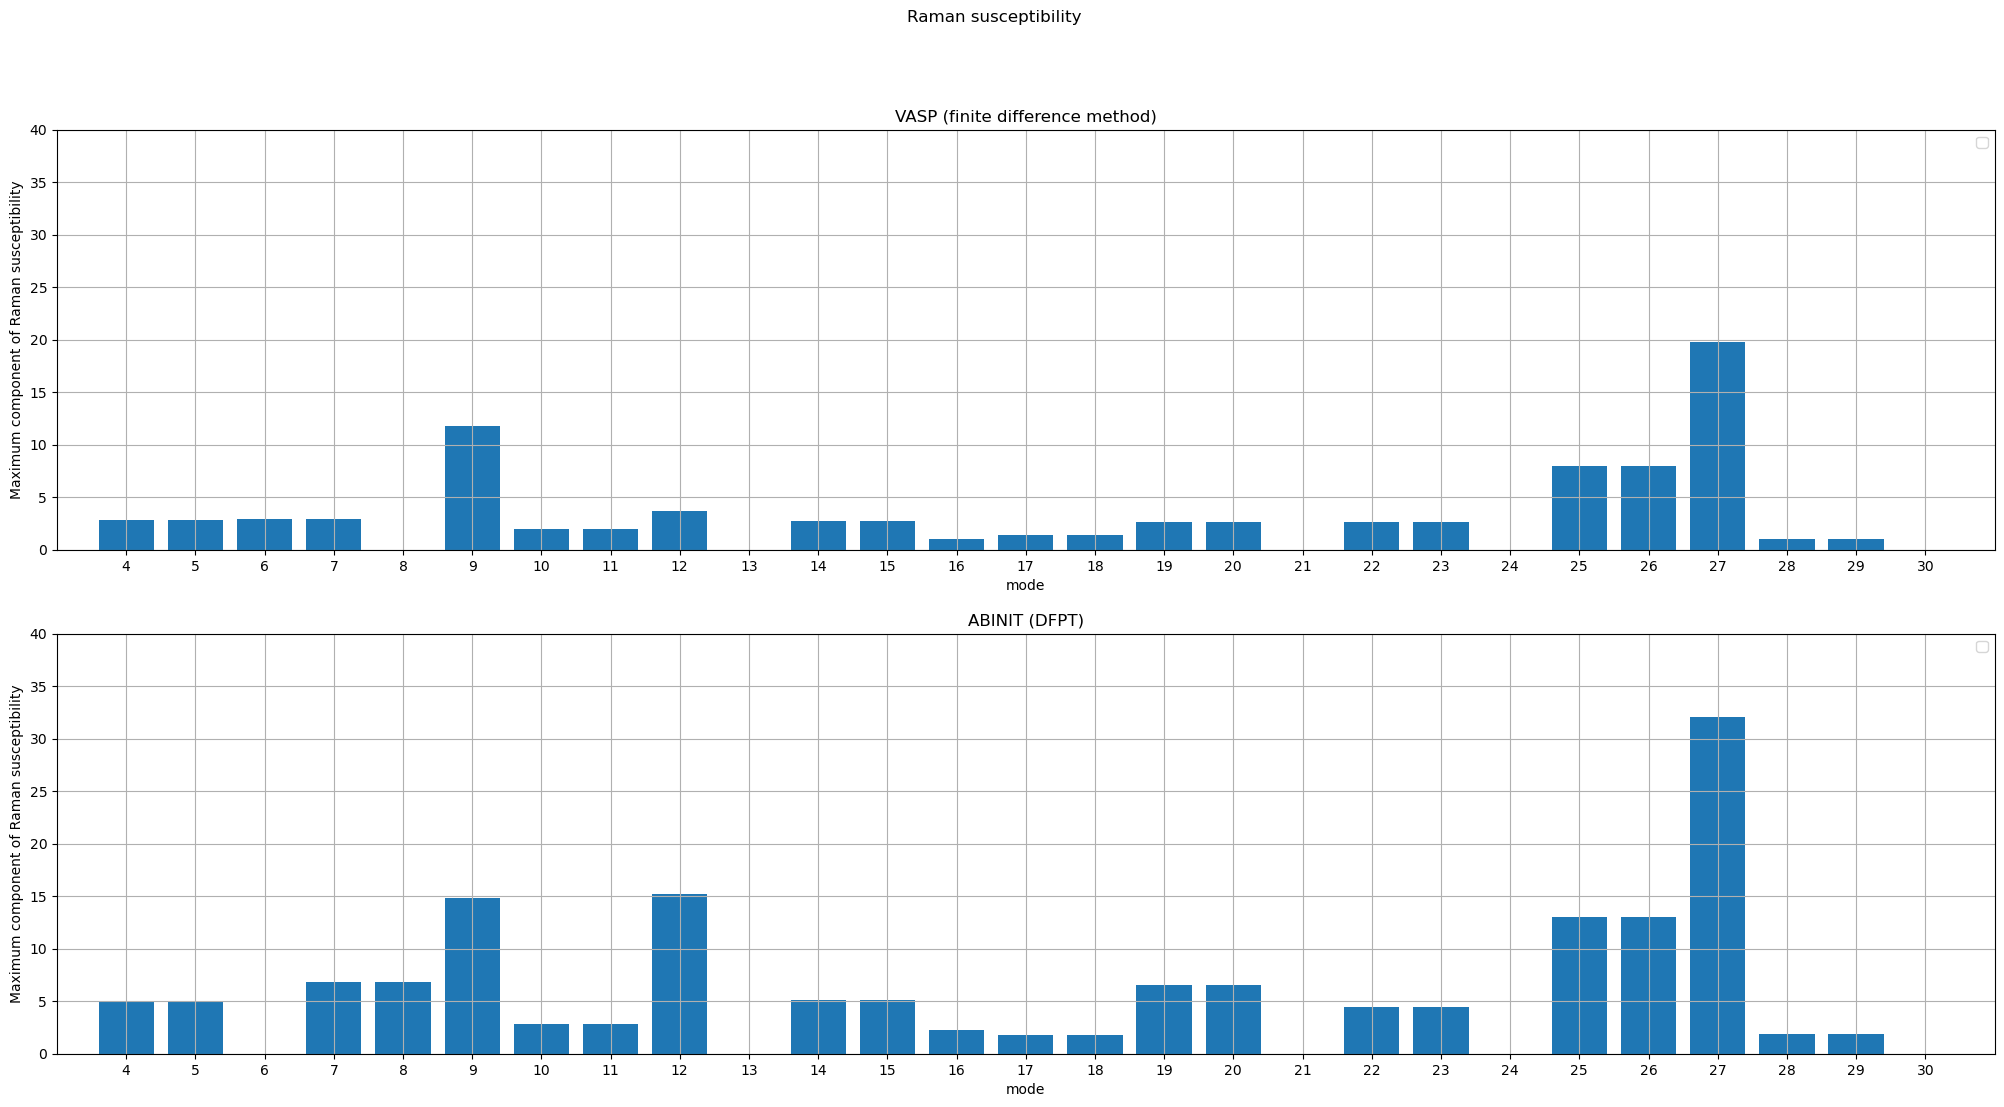

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, figsize=(25, 12))
fig.dpi = 100
mode = np.arange(4, 31)



alpha_vasp = np.array([0.0028346387458101983, 0.0028349199482085117, 0.002949764364509604, 0.0029497919133532014, 1.5877508199393876e-06, 0.01178227316595792, 0.0020010143142173043, 0.0020010409116314643, 0.003659391502196125, 1.002207314685645e-06, 0.002761408227365205, 0.002762242707751783, 0.0010598816321377002, 0.0013897905815537482, 0.001390065040156023, 0.0026289132387332633, 0.0026262109787402394, 9.064636393020617e-07, 0.0026552757028822233, 0.0026544331397152657, 1.6309441284089716e-06, 0.008007909902502731, 0.008007089005186003, 0.01977367998584801, 0.0010418679253160002, 0.0010423372310048363, 3.663783852646899e-07])
alpha_vasp = alpha_vasp * 1000
ax[0].bar(mode, alpha_vasp)
ax[0].axis([3, 31, 0, 40])
ax[0].set_ylabel('Maximum component of Raman susceptibility')
ax[0].set_xlabel('mode')
ax[0].grid(True)
ax[0].set_title("VASP (finite difference method)")
ax[0].legend()
ax[0].set_xticks(mode)

alpha_abinit = np.array([0.004893236, 0.004893236, 0.0, 0.006870235, 0.006870235, 0.014869034, 0.002822376, 0.002822376, 0.015173458, 0.0, 0.005117305, 0.005117305, 0.002236452, 0.001760262, 0.001760262, 0.006529915, 0.006529915, 0.0, 0.004471339, 0.004471339, 0.0, 0.013030733, 0.013030733, 0.032059801, 0.001901148, 0.001901148, 0.0])
alpha_abinit = alpha_abinit * 1000
ax[1].bar(mode, alpha_abinit)
ax[1].axis([3, 31, 0, 40])
ax[1].set_ylabel('Maximum component of Raman susceptibility')
ax[1].set_xlabel('mode')
ax[1].grid(True)
ax[1].set_title("ABINIT (DFPT)")
ax[1].legend()
ax[1].set_xticks(mode)

fig.suptitle("Raman susceptibility")

In [8]:
from pymatgen import core

core.operations.SymmOp.inversion([0.5, 0.5, 0.5])

Rot:
[[-1. -0. -0.]
 [-0. -1. -0.]
 [-0. -0. -1.]]
tau
[1. 1. 1.]